## Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import compute_class_weight
from typing import Optional
from pathlib import Path
from shutil import rmtree
from tensorflow.keras.layers import Dropout
import itertools
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve

In [2]:
churn_modeling_df = pd.read_csv("https://media.githubusercontent.com/media/gperdrizet/FSA_devops/refs/heads/main/data/unit4/Churn_Modeling.csv")
churn_modeling_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
churn_modeling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
churn_modeling_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
churn_modeling_df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7695,7696,15629985,Eidson,723,Germany,Female,47,10,90450.00,2,0,0,103379.31,1
8363,8364,15677336,Aitken,557,Germany,Male,57,1,120043.13,1,1,0,132370.75,1
1890,1891,15796969,Lahti,731,France,Male,33,4,0.00,2,1,1,74945.11,0
8991,8992,15698902,McIntyre,547,Germany,Female,42,1,142703.40,1,1,0,86207.49,1
9367,9368,15785024,Warner,629,France,Female,40,9,137409.19,1,1,0,175877.70,1
1581,1582,15576517,Everingham,445,Germany,Female,34,7,131082.17,2,1,1,70618.00,0
7270,7271,15706268,Smith,697,Germany,Male,51,1,147910.30,1,1,1,53581.14,0
8042,8043,15785352,Chang,606,France,Male,37,6,82373.94,1,0,0,172526.90,1
4400,4401,15567063,Manna,766,Germany,Female,34,6,106434.94,1,0,1,137995.66,1
9665,9666,15745794,Cocci,547,France,Male,30,6,0.00,2,1,1,18471.86,0


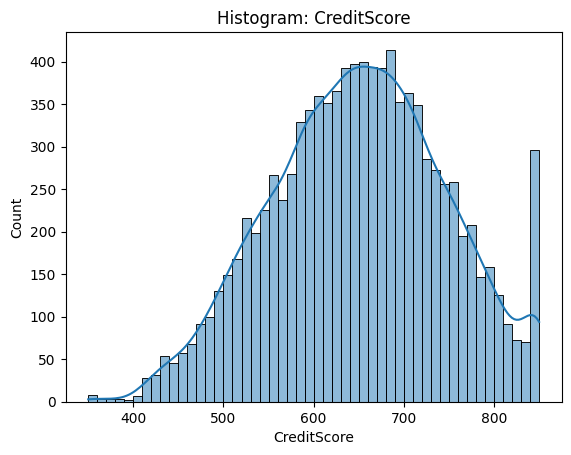

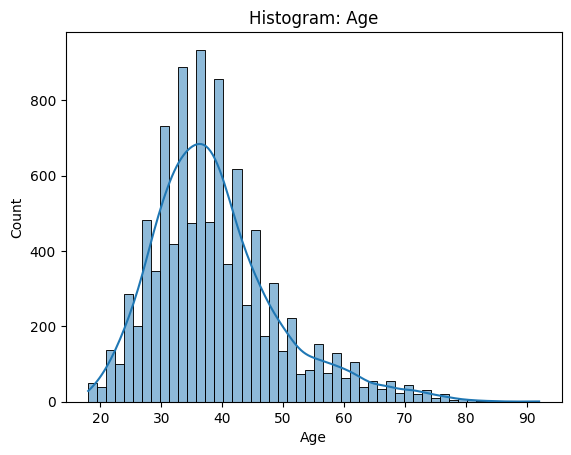

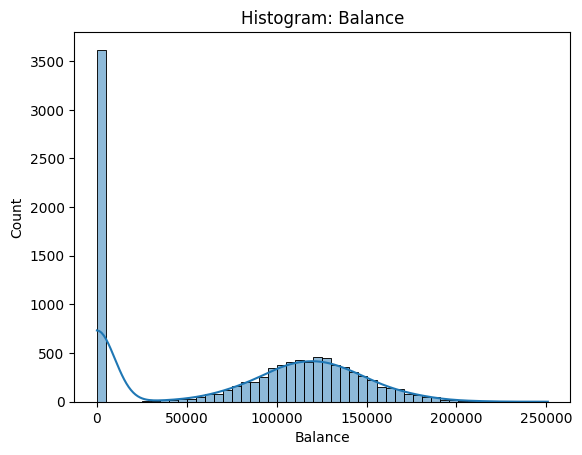

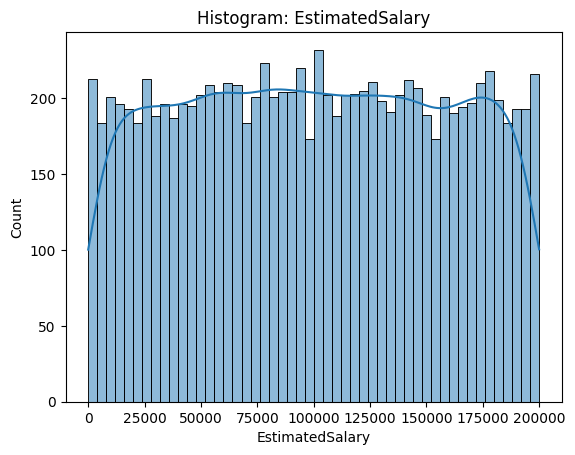

In [6]:
to_hist_plot = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

for feature in to_hist_plot:
        # Create histplots of data untouched
        sns.histplot(data=churn_modeling_df, x=feature, bins=50, kde=True)
        plt.title(f'Histogram: {feature}')

        plt.show()

In [7]:
# Remove and recreate logs directory to clear any old TensorBoard logs
log_dir = ('../logs')
rmtree(log_dir, ignore_errors=True)
Path(log_dir).mkdir(parents=True, exist_ok=True)

# Set verbosity for wherever it's accepted
verbose = 0

# Fix TensorFlow random state for reproducibility
tf.random.set_seed(315)

## GPU configuration

In [8]:
# Configure GPU settings
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    try:
        # Use only GPU 0
        tf.config.set_visible_devices(gpus[0], 'GPU')

        # Enable memory growth
        tf.config.experimental.set_memory_growth(gpus[0], True)

        print(f'Using GPU: {gpus[0]}')
        print('Memory growth enabled')

    except RuntimeError as e:
        print(e)

# Trigger one-time XLA compilation message so we don't have to look at it later
@tf.function(jit_compile=True)
def simple_xla_op():
    return tf.add(tf.constant(1.0), tf.constant(2.0))

_ = simple_xla_op()

In [9]:
churn_modeling_df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2319,2320,15681446,Sun,636,Germany,Female,37,9,157098.52,1,1,1,153535.27,0
6033,6034,15759966,Chiemenam,612,Spain,Female,36,5,119799.27,2,1,0,159416.58,0
1710,1711,15567993,Palmer,828,Spain,Male,28,8,134766.85,1,1,0,79355.87,0
5292,5293,15732610,Ahern,745,France,Female,28,6,0.00,2,1,0,154389.18,0
4606,4607,15784958,Allan,797,France,Female,55,10,0.00,4,1,1,49418.87,1
7072,7073,15775750,Yao,686,France,Male,37,9,134560.62,1,1,0,27596.39,0
2773,2774,15610765,Onwumelu,559,France,Male,29,1,0.00,2,0,0,155639.76,0
8760,8761,15727819,Hartley,677,Spain,Female,34,10,171671.90,1,1,1,50777.77,0
8611,8612,15617029,Young,596,Spain,Female,30,1,0.00,2,1,0,8125.39,0
590,591,15788291,Okwuadigbo,713,Germany,Female,38,7,144606.22,1,1,1,56594.36,1


In [10]:
label = "Exited"
features = ["CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance","NumOfProducts","HasCrCard","IsActiveMember", "EstimatedSalary"]

## Train Test Split

In [11]:
training_df, testing_df = train_test_split(churn_modeling_df, random_state=320)

## Preprocessing

In [12]:
training_df["Geography"].unique()

array(['Germany', 'France', 'Spain'], dtype=object)

In [13]:
categorical_cols = ["Gender","Geography"]
numerical_cols = ["CreditScore", "Age", "Tenure", "Balance","NumOfProducts","HasCrCard","IsActiveMember", "EstimatedSalary"]

preprocessor = ColumnTransformer(
    transformers=[
        ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols),
        ("scaler", StandardScaler(), numerical_cols)
    ]
)

## Transform

In [14]:
X_train_processed = preprocessor.fit_transform(training_df[features])
X_test_processed  = preprocessor.transform(testing_df[features])

## Baseline

In [15]:
logistic_model = LogisticRegression(n_jobs=-1, random_state=320)
fit_result = logistic_model.fit(X_train_processed, training_df[label])

In [16]:
logistic_predictions = logistic_model.predict(X_test_processed)
logistic_accuracy = accuracy_score(testing_df[label], logistic_predictions)
print(f'Logistic regression accuracy on test set: {logistic_accuracy:.4f}')

Logistic regression accuracy on test set: 0.8064


## DNN Model

In [17]:
# Compute class weights to handle class imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(training_df[label]),
    y=training_df[label]
)

class_weight_dict = dict(enumerate(class_weights))
print(f'Class weights: {class_weight_dict}')

Class weights: {0: np.float64(0.6286672254819782), 1: np.float64(2.44299674267101)}


In [18]:
def make_callbacks(learning_rate: float, batch_size: int, patience: int = 10):
    early_stop = EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True,
        verbose=verbose
    )
    return early_stop

In [19]:
# learning_rate = 0.01
def build_model(learning_rate: float=0.01):
    model = keras.Sequential([
        layers.Input(shape=(X_train_processed.shape[1],)),
        # layers.Dense(16, activation='relu'),
        # Dropout(0.3),
        layers.Dense(32, activation='relu'),
        Dropout(0.3),
        layers.Dense(16, activation='relu'),
        Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy', 'auc']
    )

    return model

- Chose Activation Relu for being fast and avoiding vanishing gradients. Causing early layers to stop learning after backpropagation.
- Chose Sigmoid because it is a binary problem.
- Chose Adam optimizer (Adaptive Moment Estimation) for efficiency and adaptive learning rates allowing more stable convergence even with noisy gradients.
- Chose AUC because it performs better than accuracy since it evaluates across multiple thresholds unlike accuracy

In [20]:
def train_model(model: keras.Sequential, epochs: int=200, batch_size: int=128, validation_split: Optional[float]=0.2):
    history = model.fit(
        X_train_processed,
        training_df[label],
        validation_split=validation_split,
        epochs=epochs,
        batch_size=batch_size,
        verbose=verbose
    )
    return model, history

## Find best batch and learning rate

In [21]:
# %%time

batch_sizes = [256, 512, 1024]
learning_rates = [1e-6, 1e-5, 1e-4]

for batch_size, learning_rate in itertools.product(batch_sizes, learning_rates):

    print(f'Batch size: {batch_size}, learning rate: {learning_rate}...', end='\t')

    # Set-up callback for this run
    callbacks = make_callbacks(learning_rate=learning_rate, batch_size=batch_size)

    # Build and train the model
    model = build_model(learning_rate=learning_rate)
    model, history = train_model(model, batch_size=batch_size)

    print(f"final val loss: {history.history['val_loss'][-1]:.4f}, ", end=' ')
    print(f"final val auc: {history.history['val_auc'][-1]*100:.2f}%", end=' ')
    print(f"final val accuracy: {history.history['val_accuracy'][-1]*100:.2f}%")

print()

Batch size: 256, learning rate: 1e-06...	final val loss: 0.6320,  final val auc: 47.01% final val accuracy: 71.47%
Batch size: 256, learning rate: 1e-05...	final val loss: 0.4909,  final val auc: 64.17% final val accuracy: 79.67%
Batch size: 256, learning rate: 0.0001...	final val loss: 0.3496,  final val auc: 86.24% final val accuracy: 86.27%
Batch size: 512, learning rate: 1e-06...	final val loss: 0.7733,  final val auc: 44.93% final val accuracy: 35.93%
Batch size: 512, learning rate: 1e-05...	final val loss: 0.5620,  final val auc: 52.23% final val accuracy: 75.40%
Batch size: 512, learning rate: 0.0001...	final val loss: 0.3971,  final val auc: 82.68% final val accuracy: 82.00%
Batch size: 1024, learning rate: 1e-06...	final val loss: 0.8973,  final val auc: 45.99% final val accuracy: 22.73%
Batch size: 1024, learning rate: 1e-05...	final val loss: 0.5523,  final val auc: 47.38% final val accuracy: 79.67%
Batch size: 1024, learning rate: 0.0001...	final val loss: 0.4184,  final va

Based on our quick results the best parameters are:
- batch size: 256
- learning rate: 1e-4 

In [22]:
batch_size = 256
learning_rate = 1e-4

## Retrain with Optimized parameters

In [23]:
callbacks = make_callbacks(learning_rate=learning_rate, batch_size=batch_size)
model = build_model(learning_rate=learning_rate)
model, history = train_model(model, batch_size=batch_size)

## Visualize Curves

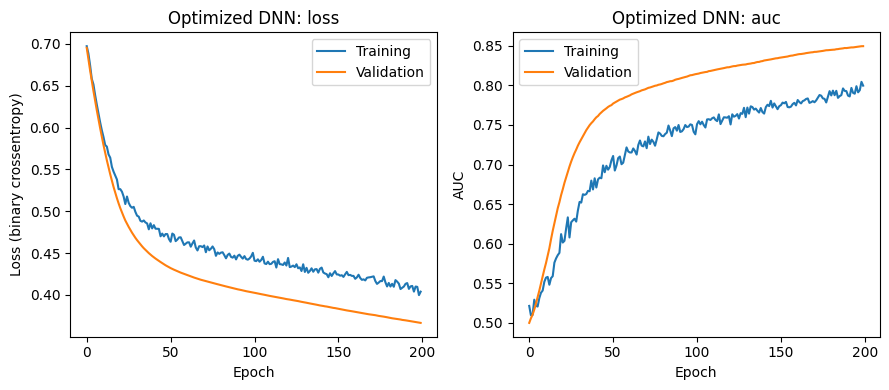

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

axes[0].set_title('Optimized DNN: loss')
axes[0].plot(history.history['loss'], label='Training')
axes[0].plot(history.history['val_loss'], label='Validation')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (binary crossentropy)')
axes[0].legend(loc='best')

axes[1].set_title('Optimized DNN: auc')
axes[1].plot(history.history['auc'], label='Training')
axes[1].plot(history.history['val_auc'], label='Validation')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('AUC')
axes[1].legend(loc='best')

plt.tight_layout()
plt.show()

## Test Evaluation

In [25]:
sequential_probs = model.predict(X_test_processed, verbose=verbose).flatten()

### Confusion Matrix

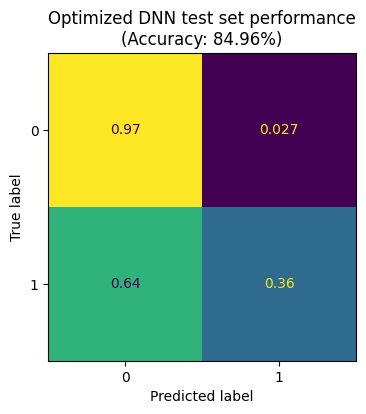

In [26]:
sequential_predictions = (sequential_probs >= 0.5).astype(int)
sequential_acc = accuracy_score(testing_df[label], sequential_predictions)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

ax.set_title(f'Optimized DNN test set performance\n(Accuracy: {sequential_acc:.2%})')

disp = ConfusionMatrixDisplay.from_predictions(
    testing_df[label],
    sequential_predictions,
    normalize='true',
    ax=ax,
    colorbar=False
)

### AUC-ROC Curve

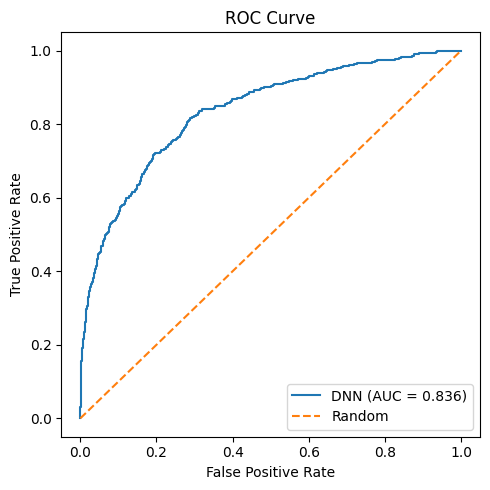

In [27]:
fpr, tpr, thresholds = roc_curve(testing_df[label], sequential_probs)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ax.plot(fpr, tpr, label=f'DNN (AUC = {roc_auc:.3f})')
ax.plot([0, 1], [0, 1], linestyle='--', label='Random')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend(loc='lower right')
plt.tight_layout()
plt.show()


### Precision-Recall Curve

PR AUC: 0.637


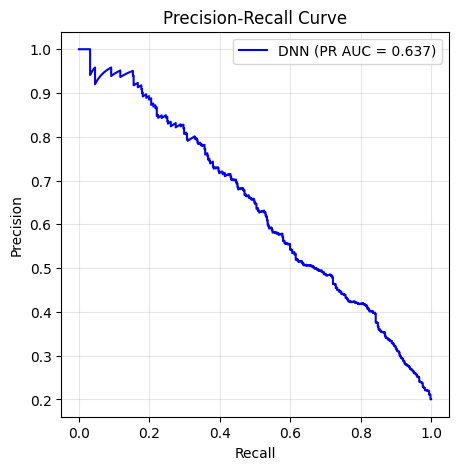

In [28]:
precision, recall, thresholds = precision_recall_curve(testing_df[label], sequential_probs)

# Compute average precision (area under PR curve)
pr_auc = auc(recall, precision)
print(f"PR AUC: {pr_auc:.3f}")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ax.plot(recall, precision, color='blue', label=f'DNN (PR AUC = {pr_auc:.3f})')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve')
ax.legend(loc='upper right')
ax.grid(alpha=0.3)
plt.show()

Our PR curve helps us to determine where or if we want to move the threshold for catching more churners by increasing the recall

### Curve comparisons

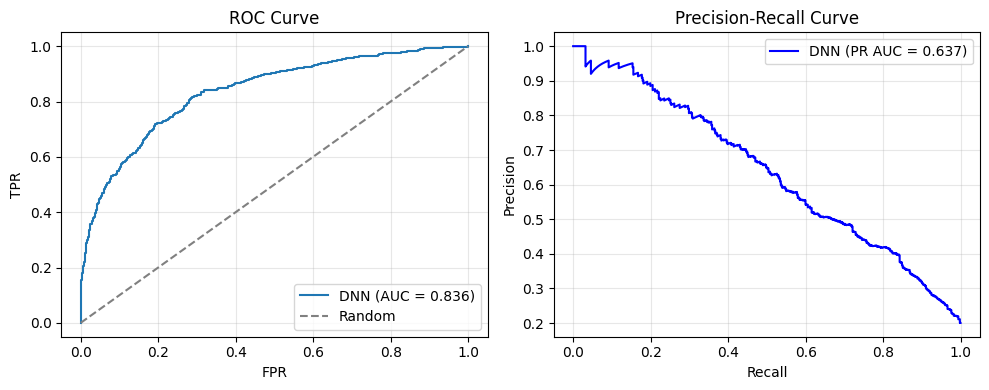

In [29]:
# ROC
fpr, tpr, _ = roc_curve(testing_df[label], sequential_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 4))

# ROC subplot
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'DNN (AUC = {roc_auc:.3f})')
plt.plot([0,1],[0,1], linestyle='--', color='gray', label='Random')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)

# PR subplot
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'DNN (PR AUC = {pr_auc:.3f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


## Model comparison

In [30]:
print(f'Logistic regression accuracy on test set: {logistic_accuracy:.4f}')
print(f'Optimized DNN model auc on test set: {roc_auc:.4f}')

Logistic regression accuracy on test set: 0.8064
Optimized DNN model auc on test set: 0.8358


## Final Training

In [31]:
# Combine arrays
combined_X = np.vstack([X_train_processed, X_test_processed])
combined_y = np.concatenate([training_df[label].values, testing_df[label].values])

# Build final model with optimized hyperparameters
final_model = build_model(learning_rate=learning_rate)

# Train on combined dataset (no validation split for final run)
final_history = final_model.fit(
    combined_X,
    combined_y,
    epochs=200,
    batch_size=batch_size,
    class_weight=class_weight_dict,
    verbose=verbose
)

print(f"Final training accuracy: {final_history.history['accuracy'][-1]*100:.2f}%")
print(f"Final training auc: {final_history.history['auc'][-1]*100:.2f}%")
print(f"Final training loss: {final_history.history['loss'][-1]:.4f}")

Final training accuracy: 76.30%
Final training auc: 82.09%
Final training loss: 0.5183


## Conclusion
- Here we learned about loss metrics and how they can affect how our model performs on convergence. 
- Activation functions are important depending on the problem where the model wont even be able to determine a solution. 
- Learning rates that are too small can't find a good solution causing accuracy to fall significantly. 
- Optimizers like Adam handle noisy data with adaptive learning, leading to faster convergence. 
- AUC tends to be beteter than accuracy in a lot of problems, especially imbalanced weight class ones by searching through multiple thresholds. 

I learned a bit about neural networks, there's a lot more to tweak and to know. Preprocessing is a hassle and a must for DNNs to actually perform well. Hyperparameter tuning is very very sensitive when changed. This is the first time trying to decide a loss metric to be a determining factor of how well a model performs. A lot of nuances were discovered with imbalanced data. Overall, there is a lot more to learn when messing with DNNs. 